# DataAnalysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu

data_path = 'Data.csv'
data = pd.read_csv(data_path, delimiter=';')

sns.set_palette("Set2")
plt.rcParams.update({'font.size': 14}) 

figures = {}

## Time Metric

In [11]:
def calculate_total_time(row):
    total_time = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')
            if len(parts) == 2:
                time_str = parts[0]
            else:
                time_str = task
            total_time += int(time_str)
    return total_time

task_columns = data.iloc[:, 3:11]

data['Total_Time'] = task_columns.apply(calculate_total_time, axis=1)

data['Total_Time_Minutes'] = (data['Total_Time'] / 60).round(0)

data_with_ai = data[data['With AI'] == 'Yes']

data_filtered = data[data['With AI'].isin(['Yes', 'No'])]

## Split data for each exam set

In [12]:
Exam_set1_with_ai = data.loc[(data['Exam Set'] == 'Exam Set 1') & (data['With AI'] == 'Yes')]

Exam_set1_without_ai = data.loc[(data['Exam Set'] == 'Exam Set 1') & (data['With AI'] == 'No')]

Exam_set2_with_ai = data.loc[(data['Exam Set'] == 'Exam Set 2') & (data['With AI'] == 'Yes')]

Exam_set2_without_ai = data.loc[(data['Exam Set'] == 'Exam Set 2') & (data['With AI'] == 'No')]

## Code correctness metric

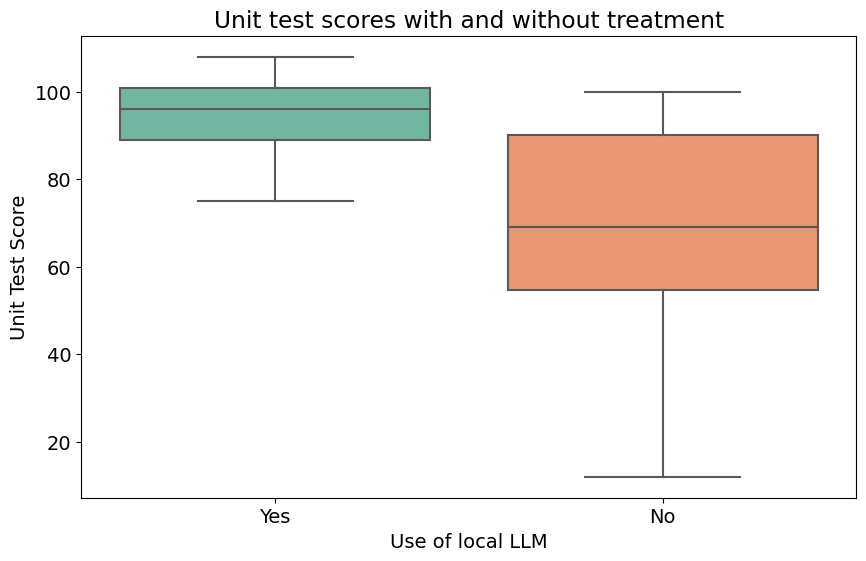

In [13]:
data_ai = data[data['With AI'] == 'Yes']['Unit Test'].dropna()
data_no_ai = data[data['With AI'] == 'No']['Unit Test'].dropna()

colors = sns.color_palette("Set2")[0:2]

plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Unit Test', data=data, palette={'Yes': colors[0], 'No': colors[1]})
plt.title('Unit test scores with and without treatment')
plt.xlabel('Use of local LLM')
plt.ylabel('Unit Test Score')
figures['Boxplot of Unit Test Scores by local LLM Usage'] = plt.gcf()
plt.show()

## Prompt metric

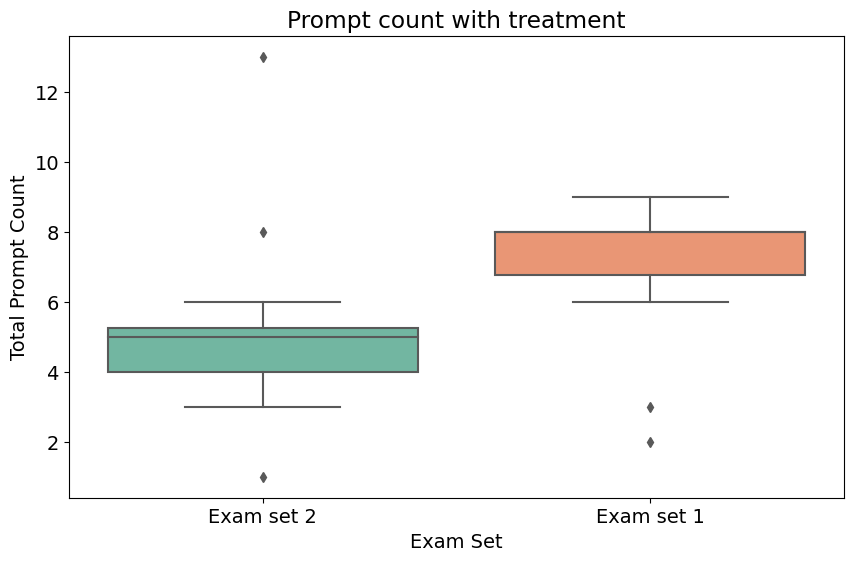

In [14]:
def calculate_total_prompt(row):
    total_prompt = 0
    for task in row:
        if isinstance(task, str):
            parts = task.split(' ')
            if len(parts) == 2:
                prompt_str = parts[1]
                total_prompt += int(prompt_str)
    return total_prompt

task_columns = data.iloc[:, 3:11]

# Calculate total prompt count for each row
data['Total_Prompt_Count'] = task_columns.apply(calculate_total_prompt, axis=1)

# Filter data for rows with 'With AI' == 'Yes'
data_with_ai = data[data['With AI'] == 'Yes']

# Define a custom palette for the box plot
custom_palette = {'Exam set 2': sns.color_palette("Set2")[0], 'Exam set 1': sns.color_palette("Set2")[1]}

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam Set', y='Total_Prompt_Count', data=data_with_ai, palette=custom_palette)
plt.title('Prompt count with treatment')
plt.xlabel('Exam Set')
plt.ylabel('Total Prompt Count')
plt.xticks([0, 1], ['Exam set 2', 'Exam set 1'])
figures['box_plot_prompt_count'] = plt.gcf()
plt.show()

## Points per task

In [15]:
data_with_ai_robots = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 1')]
data_without_ai_robots = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 1')]
data_with_ai_ads = data[(data['With AI'] == 'Yes') & (data['Exam Set'] == 'Exam set 2')]
data_without_ai_ads = data[(data['With AI'] == 'No') & (data['Exam Set'] == 'Exam set 2')]

task_columns_robots = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points', 'Task 8 points', 'Task 9 points']
task_columns_adv = ['Task 1 points', 'Task 2 points', 'Task 3 points', 'Task 4 points', 'Task 5 points', 'Task 6 points', 'Task 7 points']

max_points_per_task_robots = [15, 10, 5, 15, 15, 10, 15, 20, 15]
max_points_per_task_advertisement = [20, 10, 15, 20, 15, 15, 25]

def generate_comparison_results(with_ai_data, without_ai_data, tasks, max_points):
    results = []
    for i, task in enumerate(tasks):
        with_ai_points = with_ai_data[task].mean()
        without_ai_points = without_ai_data[task].mean()
        difference = with_ai_points - without_ai_points
        results.append({
            'Task': task.replace(' points', ''),
            'Without AI': round(without_ai_points, 2),
            'With AI': round(with_ai_points, 2),
            'Difference': round(difference, 2),
            'Max Points': max_points[i]
        })
    return results

comparison_results_robots = generate_comparison_results(data_with_ai_robots, data_without_ai_robots, task_columns_robots, max_points_per_task_robots)
comparison_results_advertisements = generate_comparison_results(data_with_ai_ads, data_without_ai_ads, task_columns_adv, max_points_per_task_advertisement)

print("Exam set 1 Tasks Points Comparison:")
for result in comparison_results_robots:
    print(result)

print("\nExam set 2 Tasks Points Comparison:")
for result in comparison_results_advertisements:
    print(result)


Exam set 1 Tasks Points Comparison:
{'Task': 'Task 1', 'Without AI': 14.67, 'With AI': 14.92, 'Difference': 0.25, 'Max Points': 15}
{'Task': 'Task 2', 'Without AI': 9.08, 'With AI': 10.0, 'Difference': 0.92, 'Max Points': 10}
{'Task': 'Task 3', 'Without AI': 5.0, 'With AI': 4.92, 'Difference': -0.08, 'Max Points': 5}
{'Task': 'Task 4', 'Without AI': 13.33, 'With AI': 13.75, 'Difference': 0.42, 'Max Points': 15}
{'Task': 'Task 5', 'Without AI': 13.08, 'With AI': 14.58, 'Difference': 1.5, 'Max Points': 15}
{'Task': 'Task 6', 'Without AI': 9.17, 'With AI': 10.0, 'Difference': 0.83, 'Max Points': 10}
{'Task': 'Task 7', 'Without AI': 11.83, 'With AI': 14.83, 'Difference': 3.0, 'Max Points': 15}
{'Task': 'Task 8', 'Without AI': 11.67, 'With AI': 17.67, 'Difference': 6.0, 'Max Points': 20}
{'Task': 'Task 9', 'Without AI': 5.67, 'With AI': 11.92, 'Difference': 6.25, 'Max Points': 15}

Exam set 2 Tasks Points Comparison:
{'Task': 'Task 1', 'Without AI': 16.25, 'With AI': 19.33, 'Difference': 3.

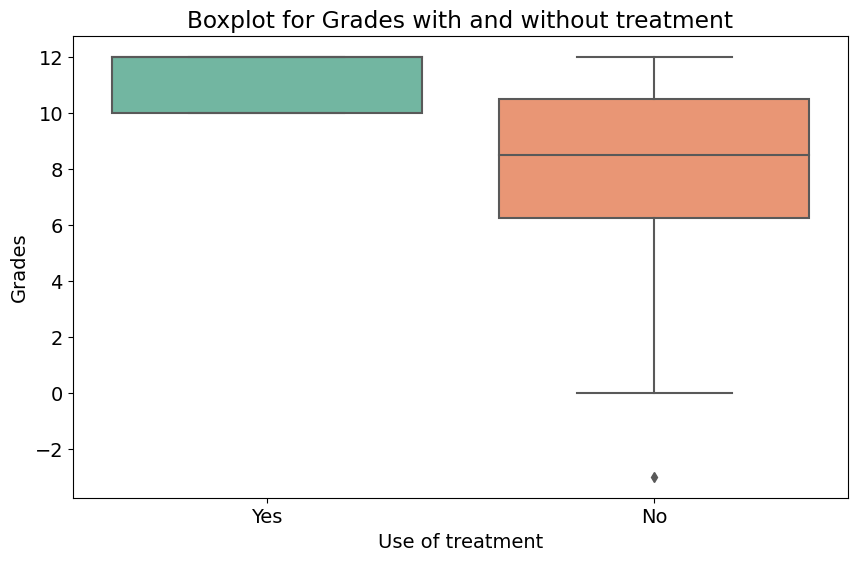

In [16]:
data_filtered = data[['With AI', 'Grade']]

# Create a boxplot for grades categorized by the use of AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='With AI', y='Grade', data=data_filtered, palette='Set2')
plt.title('Boxplot for Grades with and without treatment')
plt.xlabel('Use of treatment')
plt.ylabel('Grades')
plt.grid(False)
figures['Boxplot_grades'] = plt.gcf()
plt.show()


### Filtering for backgroundinformation

In [17]:
filtered_data = data.iloc[::2]
filtered_data['Which operating system do you usually use'] = data['Which operating system do you usually use'].iloc[::2].values

column_names = [
    'How many years of developer experience do you have?',
    'How many years of experience do you have with Java?',
    'How many months is it since you coded in Java?',
    'How many years of experience do you have with Visual Studio Code?',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?'
]

for column in column_names:
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

rename_dict = {
    'How many years of developer experience do you have?': 'Dev Exp (Years)',
    'How many years of experience do you have with Java?': 'Java Exp (Years)',
    'How many months is it since you coded in Java?': 'Java Coding Gap (Years)',
    'How many years of experience do you have with Visual Studio Code?': 'VS Code Exp (Years)',
    'How much experience in years do you have in using an LLM(ChatGPT, CoPilot, Gemini)?': 'LLM Exp (Years)'
}

filtered_data.rename(columns=rename_dict, inplace=True)

for column in rename_dict.values():  # Using new column names
    filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')

C:\Users\sverr\AppData\Local\Temp\ipykernel_17324\3909332728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Which operating system do you usually use'] = data['Which operating system do you usually use'].iloc[::2].values
C:\Users\sverr\AppData\Local\Temp\ipykernel_17324\3909332728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = pd.to_numeric(filtered_data[column], errors='coerce')
C:\Users\sverr\AppData\Local\Temp\ipykernel_17324\3909332728.py:23: SettingWith

### Difference between Operating system and 'Total Time Minutes

In [18]:
if 'Which operating system do you usually use' not in filtered_data.columns:
    print("Column 'Which operating system do you usually use' is not present in the data.")
else:
    # Grouping the data by operating system and calculating the mean values
    grouped_data = filtered_data.groupby('Which operating system do you usually use').mean()

    # Extracting the average points and time for each operating system
    average_points_windows = grouped_data.loc['Windows', 'Total Points']
    average_time_windows = grouped_data.loc['Windows', 'Total_Time_Minutes']
    average_points_macos = grouped_data.loc['MacOS', 'Total Points']
    average_time_macos = grouped_data.loc['MacOS', 'Total_Time_Minutes']

    # Print the results
    print("Average time spent on tasks for Windows users:", average_time_windows)
    print("Average time spent on tasks for MacOS users:", average_time_macos)
    print("Average points on tasks for Windows users:", average_points_windows)
    print("Average points on tasks for MacOS users:", average_points_macos)

TypeError: Could not convert Exam set 2 to numeric

### Descriptive statistics

### Descriptive statistics on Time per task

In [19]:
data['Total_Time_Minutes'] = data.iloc[:, 3:11].apply(calculate_total_time, axis=1) / 60

if 'Total_Time_Minutes' in data.columns:
    grouped_time = data.groupby('With AI')['Total_Time_Minutes']
    time_stats = grouped_time.agg(['mean', 'median', 'var', 'std'])
    time_stats['95% CI'] = grouped_time.apply(lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x))))
    t_test_time = ttest_ind(grouped_time.get_group('Yes'), grouped_time.get_group('No'), equal_var=False)

    print(time_stats)
    print('T-test for Time:', t_test_time)
else:
    print("Column 'Total_Time_Minutes' does not exist. Please check your data preprocessing steps.")


              mean     median        var       std  \
With AI                                              
No       24.372222  25.216667  15.623180  3.952617   
Yes      17.062500  16.816667  43.419909  6.589379   

                                           95% CI  
With AI                                            
No        (22.790875170138737, 25.95356927430571)  
Yes      (14.426247972686788, 19.698752027313212)  
T-test for Time: TtestResult(statistic=-4.660386722085493, pvalue=3.8778672185273446e-05, df=37.65428357048778)


### Descriptive statistics on Points per task

In [20]:
if 'Total Points' not in data.columns:
    print("Total Points column missing. Check data processing steps.")
else:
    grouped_points = data.groupby('With AI')['Total Points']

    points_stats = grouped_points.agg(['mean', 'median', 'var', 'std'])
    points_stats['95% CI'] = grouped_points.apply(
        lambda x: stats.norm.interval(0.95, loc=np.mean(x), scale=np.std(x, ddof=1)/np.sqrt(len(x)))
    )

    t_test_points = ttest_ind(
        grouped_points.get_group('Yes'), 
        grouped_points.get_group('No'), 
        equal_var=False
    )

    print(points_stats)
    print('T-test for Points:', t_test_points)


               mean  median         var        std  \
With AI                                              
No        84.500000    87.5  694.956522  26.362028   
Yes      111.583333   113.5   67.384058   8.208779   

                                           95% CI  
With AI                                            
No           (73.9531859857394, 95.0468140142606)  
Yes      (108.29919795836452, 114.86746870830214)  
T-test for Points: TtestResult(statistic=4.805440638113601, pvalue=4.9564516579501216e-05, df=27.418688581712328)


### Descriptive statistics on Unit test

In [21]:
unit_test_stats = data.groupby('With AI')['Unit Test'].agg([
    'mean', 'median', 'min', 'max', 'var', 'std', 'skew'
])
unit_test_stats['range'] = data.groupby('With AI')['Unit Test'].max() - data.groupby('With AI')['Unit Test'].min()
unit_test_stats['IQR'] = data.groupby('With AI')['Unit Test'].quantile(0.75) - data.groupby('With AI')['Unit Test'].quantile(0.25)

print(unit_test_stats)

              mean  median   min    max         var        std     skew  \
With AI                                                                   
No       66.291667    69.0  12.0  100.0  768.650362  27.724544 -0.76409   
Yes      95.500000    96.0  75.0  108.0   75.826087   8.707818 -0.53294   

         range    IQR  
With AI                
No        88.0  35.25  
Yes       33.0  11.75  


## Descriptive statistics on prompts

Plots to see distribution

In [38]:
x_min = data['Total_Time_Minutes'].min()
x_max = data['Total_Time_Minutes'].max()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Total_Time_Minutes'], color='blue', kde=True)
plt.title('Total time with treatment')
plt.xlabel('Total time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(x_min, x_max)

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Total_Time_Minutes'], color='orange', kde=True)
plt.title('Total time without treatment')
plt.xlabel('Total time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(x_min, x_max)

plt.tight_layout()
figures['Distribution of Total Time - With- and without local LLM Usage'] = plt.gcf()
plt.show()


KeyError: 'Total_Time_Minutes'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


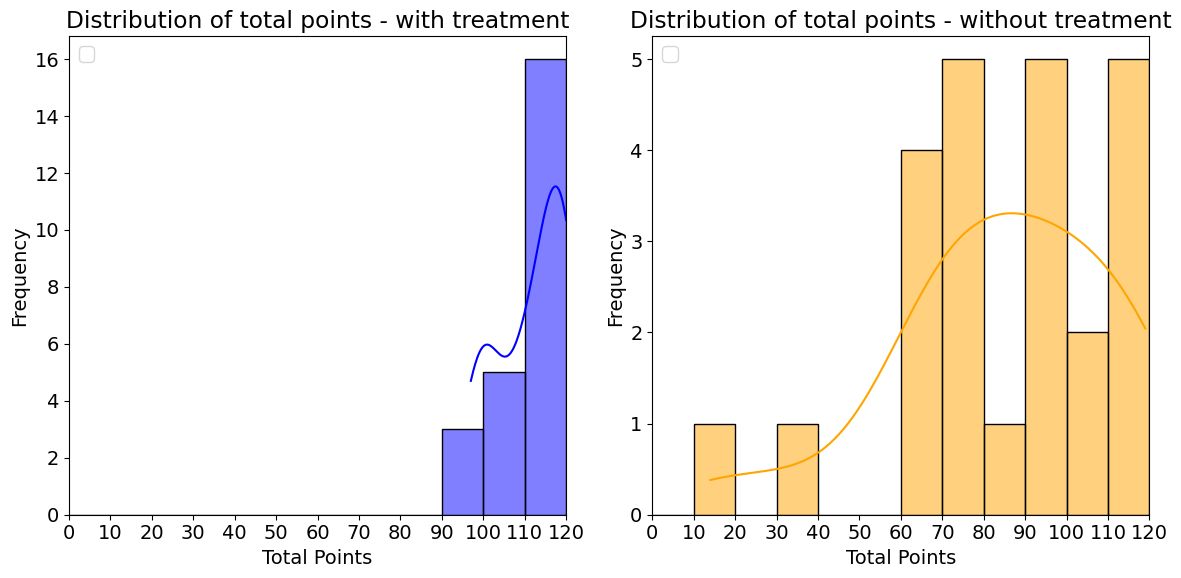

In [ ]:
plt.figure(figsize=(12, 6))

x_min = 0
x_max = 120

binwidth = 10

bins = (x_max - x_min) // binwidth

plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Total Points'], color='blue', kde=True, binrange=(x_min, x_max), bins=bins)
plt.title('Distribution of total points - with treatment')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(x_min, x_max)
plt.xticks(range(x_max, x_min - binwidth, -binwidth))

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Total Points'], color='orange', kde=True, binrange=(x_min, x_max), bins=bins)
plt.title('Distribution of total points - without treatment')
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(x_min, x_max)
plt.xticks(range(x_max, x_min - binwidth, -binwidth))

plt.tight_layout()
figures['Distribution of points - With- and without local LLM Usage'] = plt.gcf()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


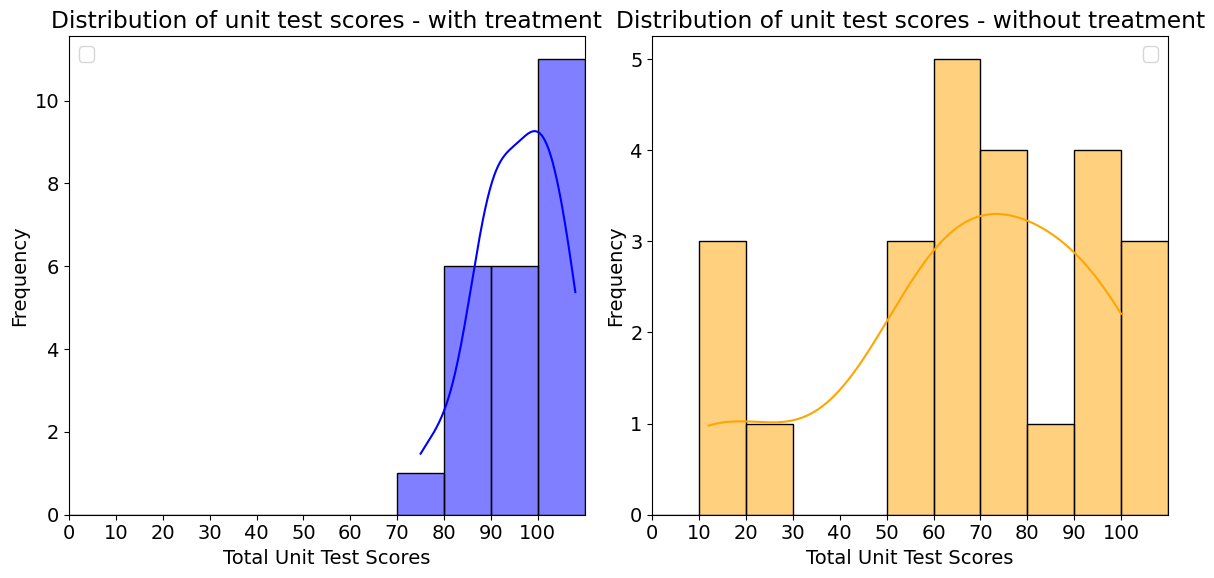

In [ ]:
plt.figure(figsize=(12, 6))

x_min = 0
x_max = 110

binwidth = 10

bins = (x_max - x_min) // binwidth

plt.subplot(1, 2, 1)
sns.histplot(data[data['With AI'] == 'Yes']['Unit Test'], color='blue', kde=True, binrange=(x_min, x_max), bins=bins)
plt.title('Distribution of unit test scores - with treatment')
plt.xlabel('Total Unit Test Scores')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(x_min, x_max)
plt.xticks(range(x_min, x_max, binwidth))

plt.subplot(1, 2, 2)
sns.histplot(data[data['With AI'] == 'No']['Unit Test'], color='orange', kde=True, binrange=(x_min, x_max), bins=bins)
plt.title('Distribution of unit test scores - without treatment')
plt.xlabel('Total Unit Test Scores')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(x_min, x_max)
plt.xticks(range(x_min, x_max, binwidth))

plt.tight_layout()
figures['Distribution of Unit Test Scores - With- and without local LLM Usage'] = plt.gcf()
plt.show()


Not normally distributed, so we opt for Mann-Whitney U Test instead of T-test

In [ ]:
time_with_ai = data[data['With AI'] == 'Yes']['Total_Time_Minutes']
time_without_ai = data[data['With AI'] == 'No']['Total_Time_Minutes']
points_with_ai = data[data['With AI'] == 'Yes']['Total Points']
points_without_ai = data[data['With AI'] == 'No']['Total Points']
scores_with_ai = data[data['With AI'] == 'Yes']['Unit Test']
scores_without_ai = data[data['With AI'] == 'No']['Unit Test']

#Mann Whitney U test for time
u_stat_time, p_val_time = stats.mannwhitneyu(time_with_ai, time_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Time:", u_stat_time, "P-value:", p_val_time)

#Mann Whitney U test for points
u_stat_points, p_val_points = stats.mannwhitneyu(points_with_ai, points_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Points:", u_stat_points, "P-value:", p_val_points)

#Mann Whitney U test for unit test
u_stat_scores, p_val_scores = stats.mannwhitneyu(scores_with_ai, scores_without_ai, alternative='two-sided')
print("Mann-Whitney U test for Unit Test Scores:", u_stat_scores, "P-value:", p_val_scores)

data_with_ai = data[data['With AI'] == 'Yes']['Grade'].dropna()
data_without_ai = data[data['With AI'] == 'No']['Grade'].dropna()

#Mann Whitney U test for grades
u_stat_grades, p_value_grades = mannwhitneyu(data_with_ai, data_without_ai, alternative='two-sided')
print("Mann-Whitney U test for grades:", u_stat_grades, "P-value:", p_value_grades)

Mann-Whitney U test for Time: 94.0 P-value: 6.607022058463276e-05
Mann-Whitney U test for Points: 494.0 P-value: 2.1943369188347926e-05
Mann-Whitney U test for Unit Test Scores: 491.5 P-value: 2.6928567991721185e-05
Mann-Whitney U test for grades: 462.0 P-value: 0.00012301770813022747


In [ ]:
filtered_data['LLM Exp (Years)'] = pd.to_numeric(filtered_data['LLM Exp (Years)'], errors='coerce')
filtered_data['Grade'] = pd.to_numeric(filtered_data['Grade'], errors='coerce')

filtered_data_clean = filtered_data.dropna(subset=['LLM Exp (Years)', 'Grade'])

spearman_correlation_grade = filtered_data_clean['LLM Exp (Years)'].corr(filtered_data_clean['Grade'], method='spearman')
print(f"The Spearman correlation coefficient between LLM experience and grades is: {spearman_correlation_grade}")


The Spearman correlation coefficient between LLM experience and grades is: 0.018994167467944342


C:\Users\sverr\AppData\Local\Temp\ipykernel_17324\2794939041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['LLM Exp (Years)'] = pd.to_numeric(filtered_data['LLM Exp (Years)'], errors='coerce')
C:\Users\sverr\AppData\Local\Temp\ipykernel_17324\2794939041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Grade'] = pd.to_numeric(filtered_data['Grade'], errors='coerce')


In [ ]:
filtered_data['Total_Time_Minutes'] = pd.to_numeric(filtered_data['Total_Time_Minutes'], errors='coerce')

filtered_data_clean = filtered_data.dropna(subset=['LLM Exp (Years)', 'Total_Time_Minutes'])

spearman_correlation_time = filtered_data_clean['LLM Exp (Years)'].corr(filtered_data_clean['Total_Time_Minutes'], method='spearman')
print(f"The Spearman correlation coefficient between LLM experience and total time minutes is: {spearman_correlation_time}")


The Spearman correlation coefficient between LLM experience and total time minutes is: -0.22075531491672032


C:\Users\sverr\AppData\Local\Temp\ipykernel_17324\4100530650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total_Time_Minutes'] = pd.to_numeric(filtered_data['Total_Time_Minutes'], errors='coerce')


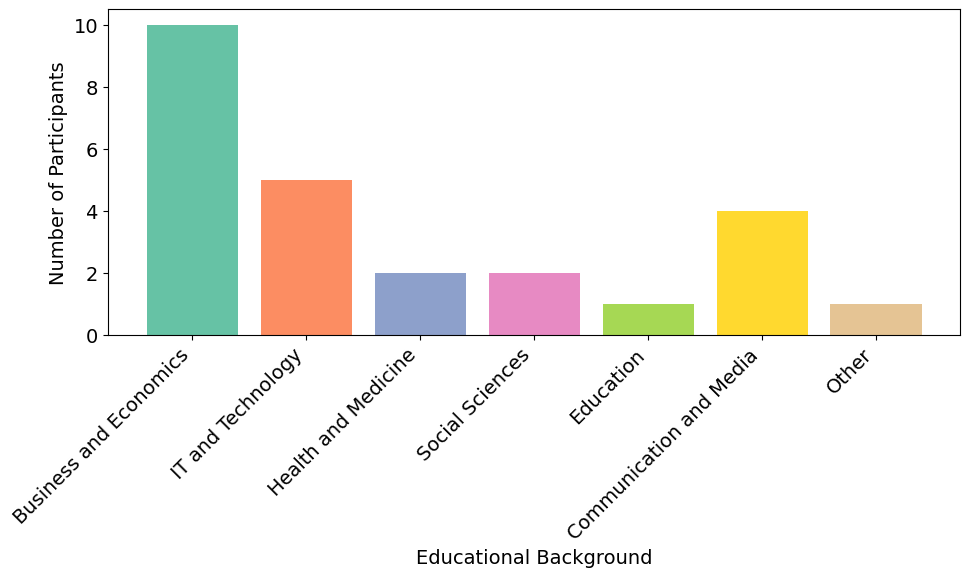

In [ ]:
categories_counts = {
    'Business and Economics': 10,
    'IT and Technology': 5,
    'Health and Medicine': 2,
    'Social Sciences': 2,
    'Education': 1,
    'Communication and Media': 4,
    'Other': 1
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2", len(categories_counts))
plt.bar(categories_counts.keys(), categories_counts.values(), color=colors)
plt.xlabel('Educational Background')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
figures['Education_background'] = plt.gcf()
plt.tight_layout()

# Display the plot
plt.show()


# Save all figures

In [ ]:
save_dir = 'Figures/'

for name, fig in figures.items():
    fig.savefig(f'{save_dir}{name}.png', dpi=300)